In [5]:
import pandas as pd
import numpy as np
import os 


In [6]:
os.getcwd()

'C:\\Users\\qraza\\OneDrive for Business\\Personal\\Python\\ML'

In [7]:
#change the unnamed column into an index - index_col
data = pd.read_csv('C:\\Users\\qraza\\OneDrive for Business\\Personal\\Python\\ML\\Advertising.csv', index_col = 0)
data.head()
data.shape

(200, 4)

In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
import seaborn as sns
%matplotlib inline

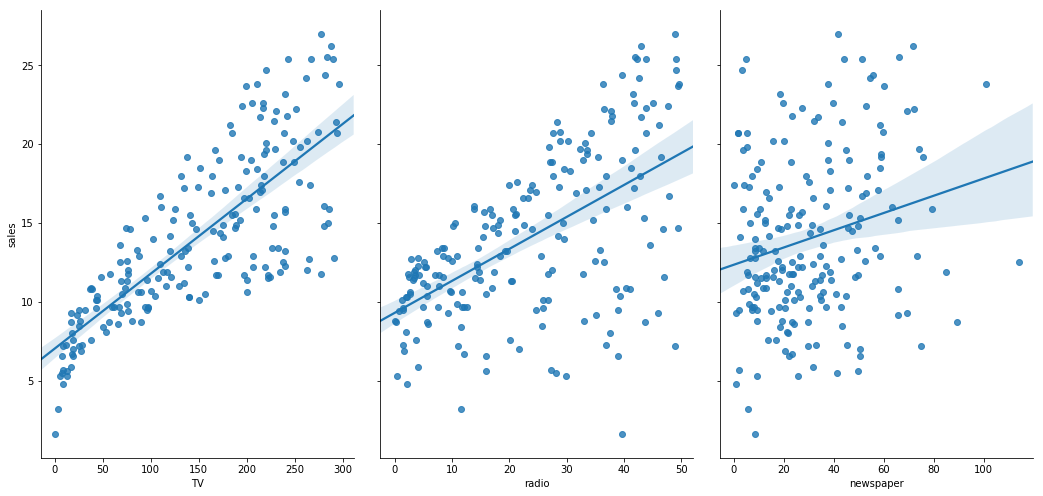

In [10]:
#strong relationship between tv & Sales, weaker between radio & sales; almost none between newspaper & sales
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 7, aspect = 0.7, kind = 'reg' )

In [11]:
# assign features and response values to X & y respectively

feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
X.shape
X.head()
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
y = data.sales
y.shape
y.head()
print(type(y))

<class 'pandas.core.series.Series'>


In [13]:
from sklearn.model_selection import train_test_split
#default 75/25 train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [14]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(50, 3)
(150, 3)
(50,)
(150,)


In [15]:
#import the Linear Regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#Intercept and coefficients of the model
print(linreg.intercept_) #intercept value beta0
print(linreg.coef_) #value of each beta 1,2 & 3


2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [17]:
#pair the coefficients with the features
dict(zip(feature_cols,linreg.coef_))

{'TV': 0.04656456787415028,
 'radio': 0.17915812245088836,
 'newspaper': 0.0034504647111804347}

In [18]:
#therefore y = 2.88 + 0.047*TV + 0.18*radio + 0.0034*newspaper
#i.e. for each unit increase in TV advertising, product sales goes up by 0.047 units. e.g. $1,000 ad spend 
#equivalent to 47 units of sales
#note correlation NOT causation

In [23]:
#Model evaluation metrics for regression
# methods include: 
# MEAN ABSOLUTE ERROR - take the difference between predicted and actual values, Sum & divide by N 
# MEAN SQUARED ERROR -  take the difference between predicted and actual values, Square, Sum & divide by N
# ROOT MEAN SQUARED ERROR - square root of MSE

In [24]:
#first assign y_pred to predict X_test
y_pred = linreg.predict(X_test)

In [25]:
#next use different eval methods to compare y_pred with y_test (we already know the values for the dependent variable)

In [26]:
from sklearn import metrics
# use mean absolute error to calculate accuracy
print(metrics.mean_absolute_error(y_test,y_pred))
# or mean squared error
print(metrics.mean_squared_error(y_test,y_pred))
# or root mean squared error (most popular) = 1.4046
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.0668917082595213
1.9730456202283384
1.4046514230328955


In [27]:
#the goal is to minimise the error - we know from above that newspaper had a very weak linear relationship with Sales.
#ergo it would make sense to remove newspaper as a feature.

In [28]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #1.388 - lower error hence better to remove newspaper 

1.3879034699382888
